
#LAB 1
#Flex
It stands for fast lexical analyzer generator which is a tool used to generate scanners: programs which recognize lexical patterns in text. It is a free alternative to LEx the standard lexical analyzer generator in Unix-based systems. Flex was written in C around 1987 by Vern Paxson and is frequently used as the lex implementation together with Berkeley Yacc parser generator on BSD-derived operating systems (as both lex and yacc are part of POSIX), or together with GNU bison (a version of yacc) in *BSD ports and in Linux distributions. Unlike Bison, flex is not part of the GNU Project and is not released under the GNU General Public License, although a manual for Flex was produced and published by the Free Software Foundation.

In [ ]:
%{
#include <stdlib.h>
#include <stdio.h>
#include <assert.h>

#define MAX_DEPTH 72

int nesting = 0 ;
unsigned int indent_stack[MAX_DEPTH] ;
unsigned int level = 0 ;

unsigned int first = 1 ;

void process_indent(char* line) ;

%}

PUNCT [-+*/=<>:]*
ID  [A-Za-z_][A-Za-z0-9_]*
INT [0-9]+

%option noyywrap

%%


^[ ]*\n       {/* Ignore blank lines. */}
^[ ]*[^ \n]+  {int last = yyleng - 1;
               process_indent(yytext) ;
               while ((last >= 0) &&
                      (yytext[last] != ' ')) {
                unput(yytext[last]);
                last-- ;}}


"("  {printf(" "); ECHO; nesting++ ; }
")"  {printf(" "); ECHO; nesting-- ; }

{ID}|{INT}|{PUNCT} {printf(" ") ; ECHO;}

[ \r] {}
\n    {}

<<EOF>>  { process_indent("") ; return 0 ; }

%%

unsigned int white_count(char* line) {
  unsigned int count = 0 ;
  while (*line == ' ')
    count++, line++ ;
  return count ;
}

void process_indent(char* line) {
  if (nesting)
    /* Ignore indents while nested. */
    return ;

  unsigned int indent = white_count(line) ;

  if (indent == indent_stack[level]) {
    if (!first) printf(" ;") ;
    first = 0 ;
    return ;
  }

  if (indent > indent_stack[level]) {
    printf(" {") ;
    assert(level+1 < MAX_DEPTH) ;
    indent_stack[++level] = indent ;
    return ;
  }

  while (indent < indent_stack[level]) {
    --level ;
    printf(" }") ;
  }

  assert(level >= 0) ;
}

int main(int argc, char* argv[]) {
  indent_stack[0] = 0 ;
  yylex() ;
  printf("\n") ;
}

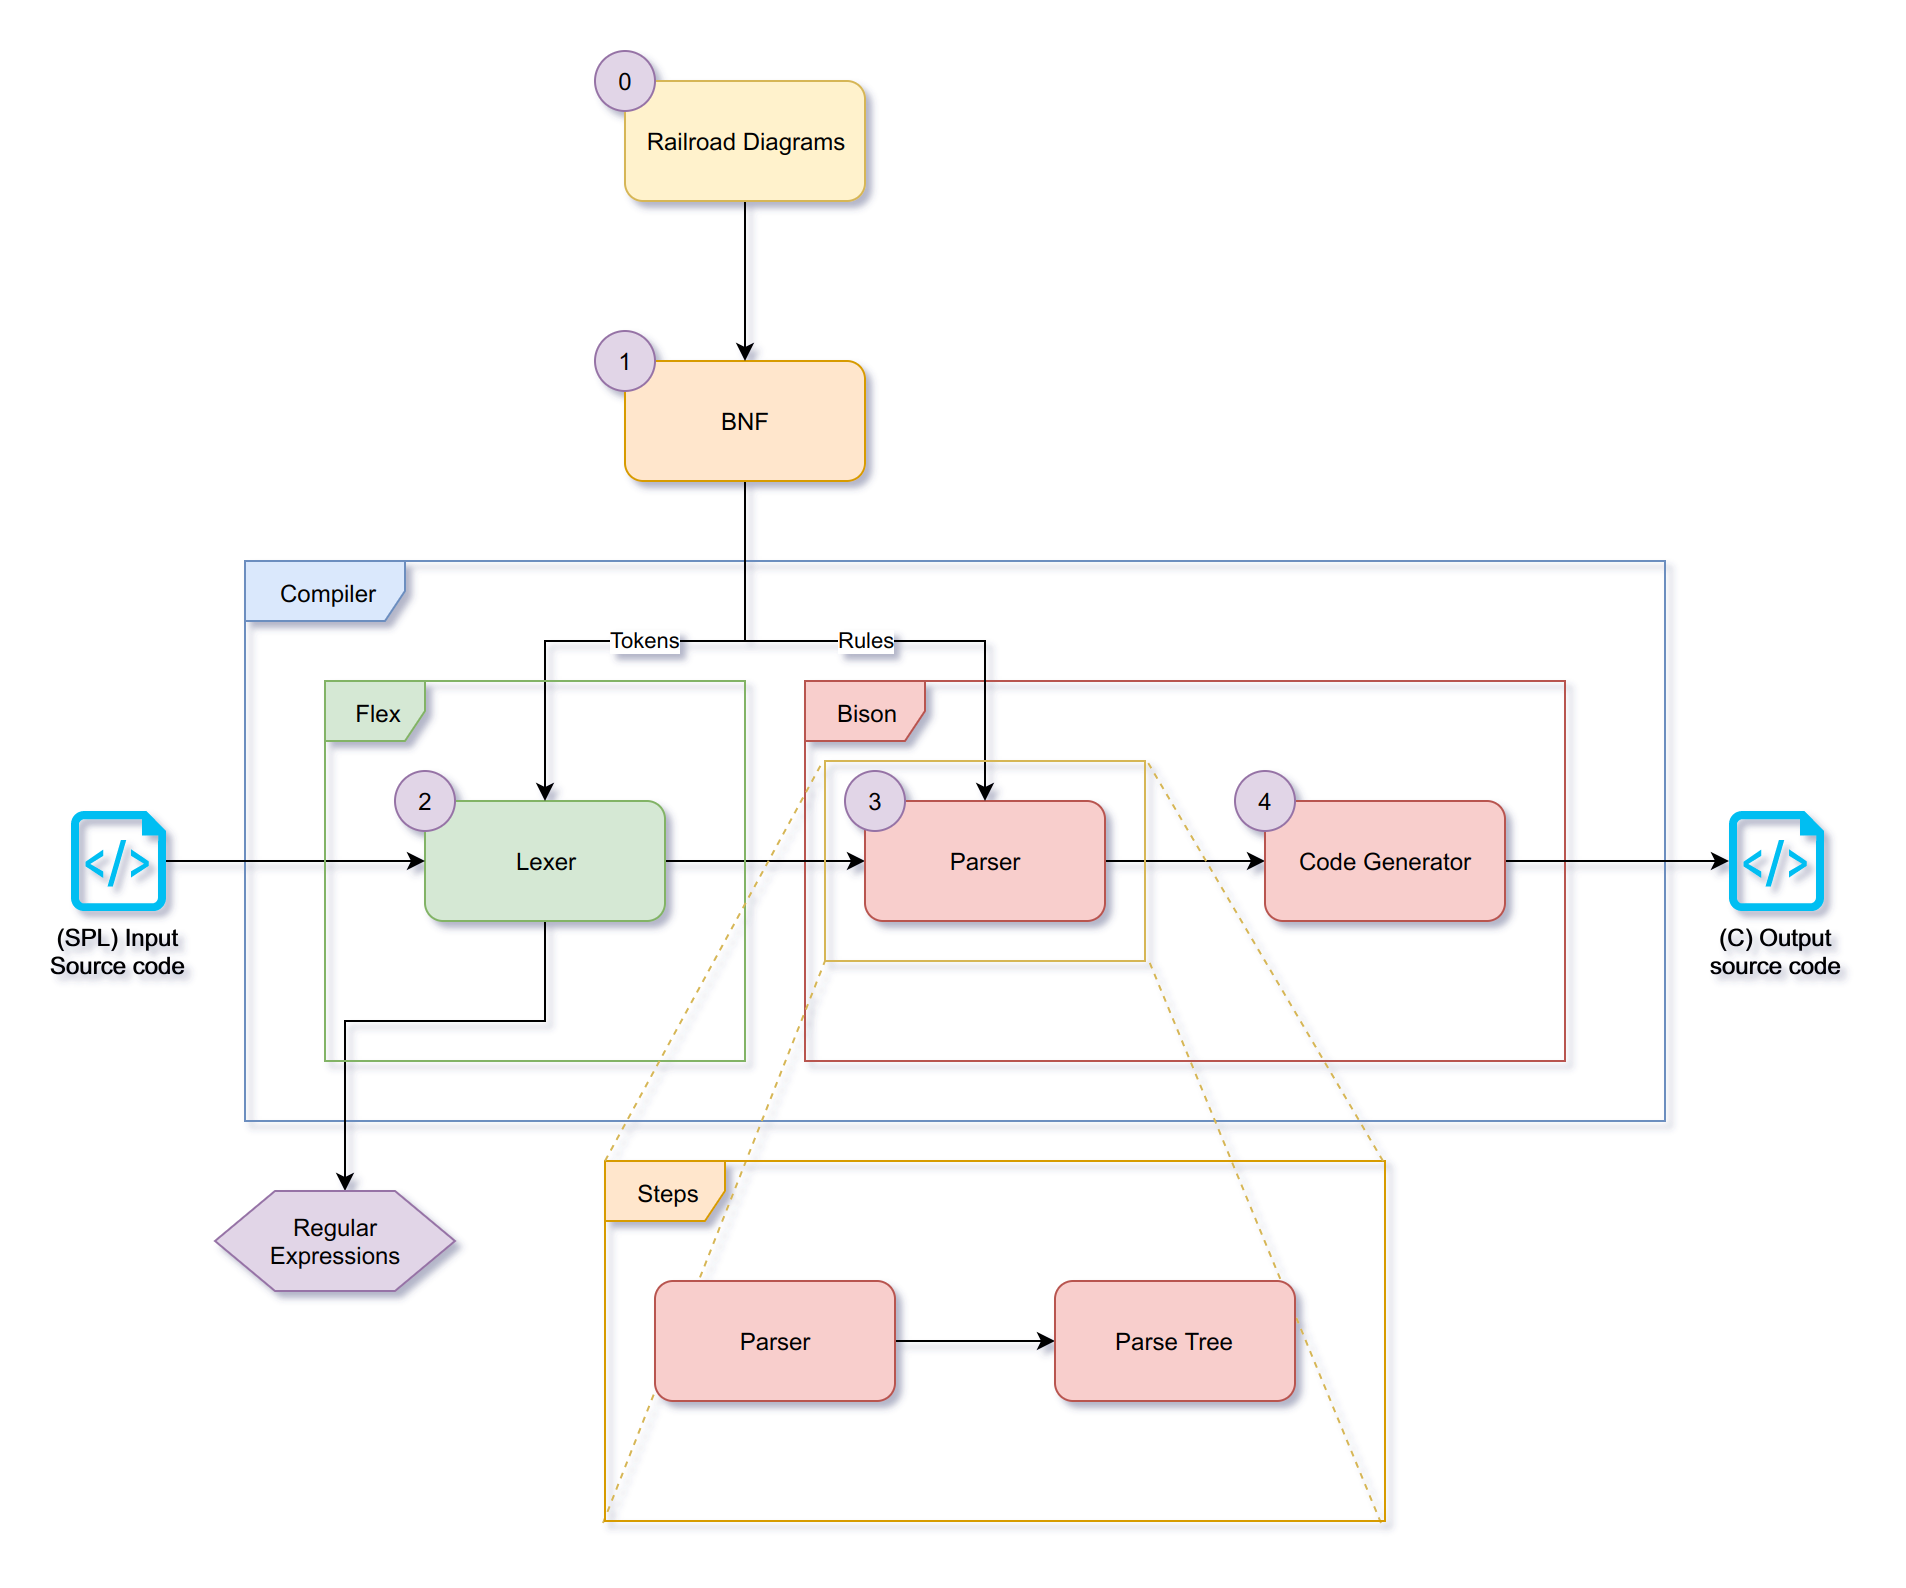

# **YACC**
YACC stands for Yet Another Compiler Compiler.
YACC provides a tool to produce a parser for a given grammar.
YACC is a program designed to compile a LALR (1) grammar  (Look Ahead Left Right).
It is used to produce the source code of the syntactic analyzer of the language produced by LALR (1) grammar.
The input of YACC is the rule or grammar and the output is a C program.
YACC was originally designed for being complemented by Lex.

# YACC Components

Input: A CFG- file.y

Output: A parser y.tab.c (yacc)

The output file "file.output" contains the parsing tables.

The file "file.tab.h" contains declarations.

The parser called the yyparse ().

Parser expects to use a function called yylex () to get tokens.

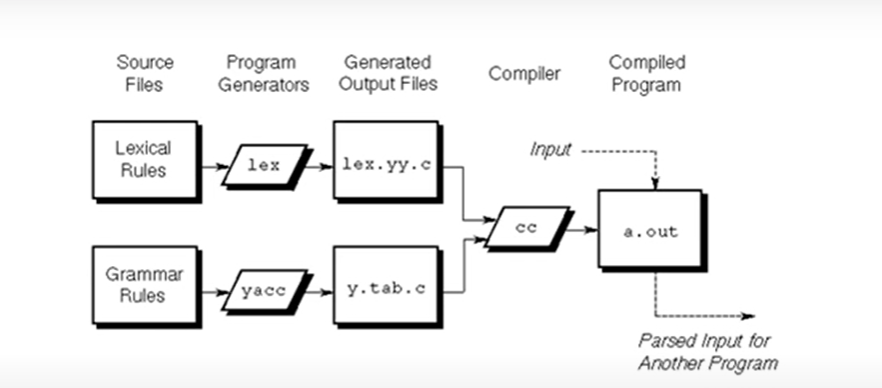


In [ ]:
%{
#include<stdio.h>

int regs[26];
int base;

%}

%start list

%union { int a; }


%token DIGIT LETTER

%left '|'
%left '&'
%left '+' '-'
%left '*' '/' '%'
%left UMINUS  /*supplies precedence for unary minus */

%%                   /* beginning of rules section */

list:                       /*empty */
         |
        list stat '\n'
         |
        list error '\n'
         {
           yyerrok;
         }
         ;
stat:    expr
         {
           printf("%d\n",$1);
         }
         |
         LETTER '=' expr
         {
           regs[$1.a] = $3.a;
         }

         ;

expr:    '(' expr ')'
         {
           $$ = $2;
         }
         |
         expr '*' expr
         {

           $$.a = $1.a * $3.a;
         }
         |
         expr '/' expr
         {
           $$.a = $1.a / $3.a;
         }
         |
         expr '%' expr
         {
           $$.a = $1.a % $3.a;
         }
         |
         expr '+' expr
         {
           $$.a = $1.a + $3.a;
         }
         |
         expr '-' expr
         {
           $$.a = $1.a - $3.a;
         }
         |
         expr '&' expr
         {
           $$.a = $1.a & $3.a;
         }
         |
         expr '|' expr
         {
           $$.a = $1.a | $3.a;
         }
         |

        '-' expr %prec UMINUS
         {
           $$.a = -$2.a;
         }
         |
         LETTER
         {
           $$.a = regs[$1.a];
         }

         |
         number
         ;

number:  DIGIT
         {
           $$ = $1;
           base = ($1.a==0) ? 8 : 10;
         }       |
         number DIGIT
         {
           $$.a = base * $1.a + $2.a;
         }
         ;

%%
main()
{
 return(yyparse());
}

yyerror(s)
char *s;
{
  fprintf(stderr, "%s\n",s);
}

yywrap()
{
  return(1);
}


IndentationError: ignored

# Bison

Bison is a general-purpose parser generator that converts an annotated context-free grammar into a deterministic LR or generalized LR (GLR) parser employing LALR(1), IELR(1) or canonical LR(1) parser tables.The Bison parser is a bottom-up parser. It tries, by shifts and reductions, to reduce the entire input down to a single grouping whose symbol is the grammar's start-symbol.\
Bison was written originally by Robert Corbett.Wilfred Hansen of Carnegie Mellon University added multi-character string literals and other features. Since then, Bison has grown more robust and evolved many other new features thanks to the hard work of a long list of volunteers. 


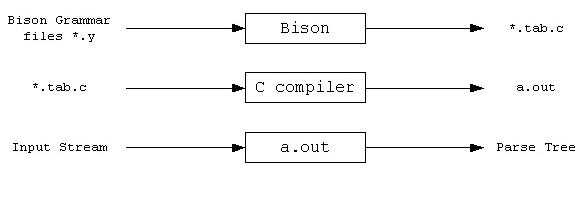

In [ ]:
%require "3.2"
%language "c++"

%define api.value.type variant

%%

result:
  list  { std::cout << $1 << '\n'; }
;


%nterm <std::vector<std::string>> list;

list:
  %empty     { /* Generates an empty string list */ }
| list item  { $$ = $1; $$.push_back ($2); }
;
%define api.value.type variant



%code
{
  // Print a list of strings.
  auto
  operator<< (std::ostream& o, const std::vector<std::string>& ss)
    -> std::ostream&
  {
    o << '{';
    const char *sep = "";

    for (const auto& s: ss)
      {
        o << sep << s;
        sep = ", ";
      }

    return o << '}';
  }
}


%nterm <std::string> item;
%token <std::string> TEXT;
%token <int> NUMBER;

item:
  TEXT
| NUMBER  { $$ = std::to_string ($1); }
;


%code
{
  namespace yy
  {
    // Return the next token.
    auto yylex () -> parser::symbol_type
    {
      static int count = 0;
      switch (int stage = count++)
        {

        case 0:
          return parser::make_TEXT ("I have three numbers for you.");

        case 1: case 2: case 3:
          return parser::make_NUMBER (stage);

        case 4:
          return parser::make_TEXT ("And that's all!");

        default:
          return parser::make_YYEOF ();

        }
    }
  }
}
%%
namespace yy
{
  // Report an error to the user.
  auto parser::error (const std::string& msg) -> void
  {
    std::cerr << msg << '\n';
  }
}

int main ()
{
  yy::parser parse;
  return parse ();
}


# LEX


    Lex is a program that generates lexical analyzer. It is used with YACC parser generator.
    The lexical analyzer is a program that transforms an input stream into a sequence of tokens.
    It reads the input stream and produces the source code as output through implementing the lexical analyzer in the C program.


#Functionality of Lex


    Firstly lexical analyzer creates a program lex.1 in the Lex language. Then Lex compiler runs the lex.1 program and produces a C program lex.yy.c.
    Finally C compiler runs the lex.yy.c program and produces an object program a.out.
    a.out is lexical analyzer that transforms an input stream into a sequence of tokens.


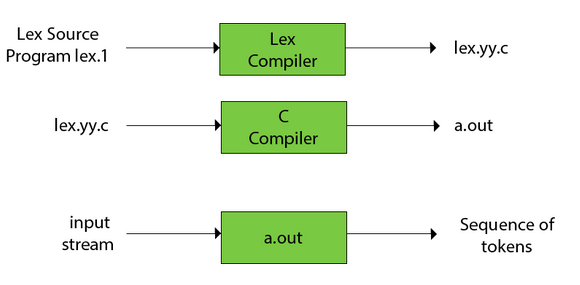

In [ ]:
extern "C"
{
        int yyparse(void);
        int yylex(void);  
        int yywrap()
        {
                return 1;
        }

}


In [ ]:


    extern int yydebug;

    main()
    {
            yydebug=1;
            yyparse();
    }

